In [30]:
from validation.FullExperimental import FullExperimental
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
df = FullExperimental()
df.rename(columns={"v [X,SX,Y,SY]": "delta"}, inplace=True)

# database
layers = df["layers"].values
layers[0] = ["Y","Y"]
df["layers"] = layers

# df = df.iloc[1:]

df.round(3)

Et [GPa]           % e        St [MPa]         Eb [GPa]        t [mm]  \
         mean    std   mean    std     mean     std     mean    std   mean   
Name                                                                         
TFP1    2.886  0.227  0.123  0.010  279.103  14.338   13.201  0.631  5.267   
TFP2    2.259  0.066  0.088  0.003  153.360   0.473    9.870  0.780  4.700   
TFP3    2.000  0.004  0.087  0.002  137.113   4.997    9.222  0.496  4.833   
TFP4    2.451  0.114  0.095  0.005  184.397   1.357   10.182  0.771  4.700   
TFP5    1.627  0.120  0.090  0.014   99.990   9.790    6.143  0.162  5.700   
TFP6    1.740  0.068  0.089  0.010  104.513   7.709    7.798  0.334  5.600   

             b [mm]        Sb [MPa]               layers     Vc  
        std    mean    std     mean     std                      
Name                                                             
TFP1  0.058  25.600  0.100  134.997  18.943       [Y, Y]  0.178  
TFP2  0.000  25.567  0.058  117.430  15.760       [Y, X]  0.164  
TFP3  0.058  25.400  0.173  128.053   5.338      [Y, SX]  0.135  
TFP4  0.000  25.667  0.153  141.703   7.525      [Y, SY]  0.144  
TFP5  0.000  25.167  0.153  107.433   3.903  [Y, SX, SY]  0.146  
TFP6  0.000  25.033  0.635  114.307  11.801   [Y, X, SY]  0.180

In [32]:
df_old = df.copy()

df_Et = df["Et [GPa]"]["mean"]
df_Eb = df["Eb [GPa]"]["mean"]
df_t = df["t [mm]"]["mean"]
df_b = df["b [mm]"]["mean"]
df_St = df["St [MPa]"]["mean"]
df_Sb = df["Sb [MPa]"]["mean"]

df = df.drop(columns=["Et [GPa]", 
                      "Eb [GPa]", 
                      "t [mm]", 
                      "b [mm]",
                      "Sb [MPa]",
                      "St [MPa]"],level=0)
df["Et [GPa]"] = df_Et
df["Eb [GPa]"] = df_Eb
df["St [MPa]"] = df_St
df["Sb [MPa]"] = df_Sb
df["t [mm]"] = df_t
df["b [mm]"] = df_b
df


% e                 layers     Vc  Et [GPa]   Eb [GPa]    St [MPa]  \
          mean       std                                                        
Name                                                                            
TFP1  0.123306  0.009827       [Y, Y]  0.178  2.885509  13.201050  279.103333   
TFP2  0.087556  0.002840       [Y, X]  0.164  2.258503   9.869501  153.360000   
TFP3  0.087444  0.002164      [Y, SX]  0.135  2.000437   9.222003  137.113333   
TFP4  0.095472  0.005491      [Y, SY]  0.144  2.451362  10.181815  184.396667   
TFP5  0.089889  0.013757  [Y, SX, SY]  0.146  1.626582   6.143105   99.990000   
TFP6  0.089083  0.010304   [Y, X, SY]  0.180  1.739870   7.798060  104.513333   

        Sb [MPa]    t [mm]     b [mm]  
                                       
Name                                   
TFP1  134.996667  5.266667  25.600000  
TFP2  117.430000  4.700000  25.566667  
TFP3  128.053333  4.833333  25.400000  
TFP4  141.703333  4.700000  25.666667  
TFP5  107.433333  5.700000  25.166667  
TFP6  114.306667  5.600000  25.033333

#### Cambiamos a de tensiones a fuerzas en bending



In [33]:
B = df["b [mm]"].values
D = df["t [mm]"].values
L = 30
df["St [N]"] = 2*B*D**2*df["St [MPa]"].values/(3*L) 

In [34]:
df

% e                 layers     Vc  Et [GPa]   Eb [GPa]    St [MPa]  \
          mean       std                                                        
Name                                                                            
TFP1  0.123306  0.009827       [Y, Y]  0.178  2.885509  13.201050  279.103333   
TFP2  0.087556  0.002840       [Y, X]  0.164  2.258503   9.869501  153.360000   
TFP3  0.087444  0.002164      [Y, SX]  0.135  2.000437   9.222003  137.113333   
TFP4  0.095472  0.005491      [Y, SY]  0.144  2.451362  10.181815  184.396667   
TFP5  0.089889  0.013757  [Y, SX, SY]  0.146  1.626582   6.143105   99.990000   
TFP6  0.089083  0.010304   [Y, X, SY]  0.180  1.739870   7.798060  104.513333   

        Sb [MPa]    t [mm]     b [mm]       St [N]  
                                                    
Name                                                
TFP1  134.996667  5.266667  25.600000  4404.170659  
TFP2  117.430000  4.700000  25.566667  1924.728208  
TFP3  128.053333  4.833333  25.400000  1807.983184  
TFP4  141.703333  4.700000  25.666667  2323.302387  
TFP5  107.433333  5.700000  25.166667  1816.851630  
TFP6  114.306667  5.600000  25.033333  1823.282325

### Experimental Data

In [35]:
df_old

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]               b [mm]            \
           mean       std      mean       std       mean       std   
Name                                                                 
TFP1  13.201050  0.630858  5.266667  0.057735  25.600000  0.100000   
TFP2   9.869501  0.780113  4.700000  0.000000  25.566667  0.057735   
TFP3   9.222003  0.495965  4.833333  0.057735  25.400000  0.173205   
TFP4  10.181815  0.770635  4.700000  0.000000  25.666667  0.152753   
TFP5   6.143105  0.161637  5.700000  0.000000  25.166667  0.152753   
TFP6   7.798060  0.334186  5.600000  0.000000  25.033333  0.635085   

        Sb [MPa]                  layers     Vc  
            mean        std                      
Name                                             
TFP1  134.996667  18.942693       [Y, Y]  0.178  
TFP2  117.430000  15.759607       [Y, X]  0.164  
TFP3  128.053333   5.337905      [Y, SX]  0.135  
TFP4  141.703333   7.525386      [Y, SY]  0.144  
TFP5  107.433333   3.902939  [Y, SX, SY]  0.146  
TFP6  114.306667  11.800790   [Y, X, SY]  0.180

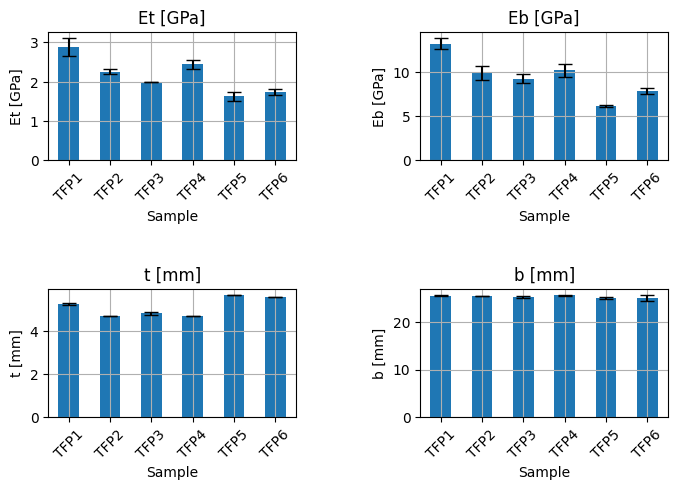

In [36]:
# bar plot 
# subplot 

# plot with error bars

fig = plt.figure()
#size 
fig.set_size_inches(8, 5)
# subplot padding
fig.subplots_adjust(hspace=1., wspace=0.5)
cols = ["Et [GPa]", "Eb [GPa]", "t [mm]", "b [mm]"]

for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    df_old[col]["mean"].plot(kind='bar', yerr=df_old[col]["std"], capsize=5, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    plt.grid()
    # rot label 45
    plt.xticks(rotation=45)

#### 1. Thickness Model
$$ \Tau (t_n,t_l,n_i) = t_n + 2t_l n_i $$
#### 2. Tensile Model

$$ \mathcal{E}_t(E_n,\vec{E_l},t_n,t_l, \mathcal{C}) = 
    \frac{E_n t_n + 2t_l \  ( \vec{\delta} \cdot \vec{E_l})}{t_t} $$
where: 
- $t_t = \Tau(t_n,t_l,n_i)$
- $n_i$ is the number of layers.
- $\delta = \mathcal{F}(\mathcal{C})$ is the function of the # of layers of each type.

#### 3. Bending Model
$$ \mathcal{E}_b(E_n,\vec{E_l},t_n,t_l) = 
\frac{E_n I_n + 2 \  (\vec{I_l} \cdot \vec{E_l})}{I_t} $$


In [37]:
from AnalyticalLayers.models import Tau_model,E_flexion,E_Tensile,Fraction_Carbon

In [38]:
# Given tn,tl,En,El 
tn = 1.0
tl = 1.0
En = 1
El = np.array([1.0, 2.0, 3.0,4.0]) #  [ E_X , E_SX , EY , E_SY ]

In [39]:
# Add column to df Thickness Model Prediction 
radius = 0.29

ni = df["layers"].apply(len)
t_p  =  Tau_model(tn, tl, ni)
Et_p =  [E_Tensile(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
Eb_p =  [E_flexion(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
V_c  =  [Fraction_Carbon(radius,tn,tl,ilayer) for ilayer in df["layers"]]
pred_df = pd.DataFrame({
    "t p [mm]"  : t_p,
    "Et p [GPa]": Et_p,
    "Eb p [GPa]": Eb_p,
    "Vc"        : V_c
})

error_df = pd.DataFrame({
    "t [mm]"  : 100*abs(df["t [mm]"]   - t_p )/df["t [mm]"]  ,
    "Et [GPa]": 100*abs(df["Et [GPa]"] - Et_p)/df["Et [GPa]"],
    "Eb [GPa]": 100*abs(df["Eb [GPa]"] - Eb_p)/df["Eb [GPa]"],
    "Vc"      : 100*abs(df["Vc"]      - V_c )/df["Vc"]
})
error_df

,t [mm],Et [GPa],Eb [GPa],Vc
Name,,,,
TFP1,5.063291,9.894587,77.395738,16.878400
TFP2,6.382979,20.301175,85.652770,9.782654
TFP3,3.448276,9.975994,76.144012,13.887782
TFP4,6.382979,22.380958,62.992847,19.269795
TFP5,22.807018,66.870483,45.564611,22.443853
TFP6,25.000000,39.583505,60.781155,24.512017


In [40]:
df.round(2)

% e             layers    Vc Et [GPa] Eb [GPa] St [MPa] Sb [MPa]  \
      mean   std                                                          
Name                                                                      
TFP1  0.12  0.01       [Y, Y]  0.18     2.89    13.20   279.10   135.00   
TFP2  0.09  0.00       [Y, X]  0.16     2.26     9.87   153.36   117.43   
TFP3  0.09  0.00      [Y, SX]  0.14     2.00     9.22   137.11   128.05   
TFP4  0.10  0.01      [Y, SY]  0.14     2.45    10.18   184.40   141.70   
TFP5  0.09  0.01  [Y, SX, SY]  0.15     1.63     6.14    99.99   107.43   
TFP6  0.09  0.01   [Y, X, SY]  0.18     1.74     7.80   104.51   114.31   

     t [mm] b [mm]   St [N]  
                             
Name                         
TFP1   5.27  25.60  4404.17  
TFP2   4.70  25.57  1924.73  
TFP3   4.83  25.40  1807.98  
TFP4   4.70  25.67  2323.30  
TFP5   5.70  25.17  1816.85  
TFP6   5.60  25.03  1823.28

In [41]:
theta = lambda x: 0.5 + 0.5*np.tanh(100*x)
relu  = lambda x: x*theta(x)

In [42]:
ni

Name
TFP1    2
TFP2    2
TFP3    2
TFP4    2
TFP5    3
TFP6    3
Name: layers, dtype: int64

In [43]:

import scipy.optimize as opt
from optim.objetive import objetive
from validation.experimental import manual_data

factor={"t":1,"Et":1,"Eb":1,"Vc":1,"St":1,"Sb":1}
factor={"t":1,"Et":1,"Eb":1,"Vc":0,"St":1,"Sb":1}


factor={"t":0,
        "Et":1,"Eb":0,
        "Vc":0,
        "St":1,"Sb":1}

t_nucleo_exp = manual_data()["t_nucleo [mm]"]
def f(x):
    r  = x[0]
    tn = x[1]
    tl = x[2]
    En = x[3]
    El = x[4:8]
    Sl = x[8:]

    
    return objetive(r,tn, tl, En, El,Sl,df,ni,factor=factor)

r_0  = 3.5
nu_0 = 0.3
tn_0 = 3.0
tl_0 = 0.5
En_0 = 1.0
El_0 = [5,5,5,5]
Sl_0 = [200,200,200,200]

x0 = [r_0,tn_0, tl_0, En_0, *El_0, *Sl_0]


eps = 1e-3

tn_limits = [0.8*t_nucleo_exp,
             1.1*t_nucleo_exp]

bounds = [ 
            (0.2,0.4),  # radius
            tn_limits,  # tn
           (0.35,0.6),  # tl
           (eps,0.8),  # En
           (eps,None),  # El[0] E_X
           (eps,None),  # El[1] E_SX
           (eps,None),  # El[2] E_Y        # [eps,None] or [10,30]
           (eps,None),  # El[3] E_SY,
           (eps,None),  # S_X
           (eps,None),  # S_SX
           (eps,None),  # S_Y
           (eps,None)   # S_SY
           ]  

res = opt.basinhopping(f, x0, niter=10, 
                       minimizer_kwargs={"bounds":bounds, 
                                         "method":"Nelder-Mead"})

c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\scipy\optimize\_basinhopping.py:294: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


In [44]:
print("tn in = ",tn_limits)

tn in =  [2.2352000000000003, 3.0734000000000004]


In [45]:
xopt = res.x
r_opt  = xopt[0]
tn_opt = xopt[1]
tl_opt = xopt[2]
En_opt = xopt[3]
El_opt = xopt[4:8]
Sl_opt = xopt[8:]


# El_opt = [
#     2885.5, # X 
#     2000,        # SX
#     1440,        # Y
#     1000         # SY
# ]
# El_opt = np.array(El_opt)*1e-3


df_pred,error_df = objetive(r_opt,tn_opt, tl_opt, 
                            En_opt, El_opt, Sl_opt,
                            df,ni,give_pred=True,factor=factor)

In [46]:
# EX , ESX , EY , ESY

bounds_min = [ b[0] for b in bounds ]
bounds_max = [ b[1] for b in bounds ]

rows = ["r","tn", "tl", "En", 
        "EX", "ESX", "EY", "ESY", 
        "SX", "SSX", "SY", "SSY"]

units = ["mm","mm", "mm", 
         "GPa", 
         "GPa", "GPa", "GPa", "GPa", 
         "MPa", "MPa", "MPa", "MPa"]

df_opt = pd.DataFrame({"Variable": rows, "x": xopt, 
                       "unit": units, "x_min": bounds_min, "x_max": bounds_max})
df_opt.index = df_opt["Variable"]
df_opt.pop("Variable")
df_opt.round(5)


,x,unit,x_min,x_max
Variable,,,,
r,0.23677,mm,0.2000,0.4000
tn,3.07336,mm,2.2352,3.0734
tl,0.59619,mm,0.3500,0.6000
En,0.79961,GPa,0.0010,0.8000
EX,1.59193,GPa,0.0010,NaN
ESX,0.82281,GPa,0.0010,NaN
EY,5.99394,GPa,0.0010,NaN
ESY,0.80514,GPa,0.0010,NaN
SX,89.94439,MPa,0.0010,NaN


In [47]:
df_opt.iloc[[3,4,5,6,7]].round(5)


,x,unit,x_min,x_max
Variable,,,,
En,0.79961,GPa,0.001,0.8
EX,1.59193,GPa,0.001,NaN
ESX,0.82281,GPa,0.001,NaN
EY,5.99394,GPa,0.001,NaN
ESY,0.80514,GPa,0.001,NaN


In [48]:
error_df.round(2)

,t [%],Et [%],Eb [%],Vc [%],St [%],Sb [%]
Name,,,,,,
TFP1,3.64,6.36,61.62,49.24,35.14,34.09
TFP2,16.13,6.69,71.97,44.91,22.36,1.40
TFP3,12.93,3.05,74.37,47.42,16.69,10.79
TFP4,16.13,21.04,76.87,50.70,38.09,3.08
TFP5,16.68,6.73,72.87,45.59,2.26,15.97
TFP6,18.76,7.71,75.77,47.04,1.31,12.86


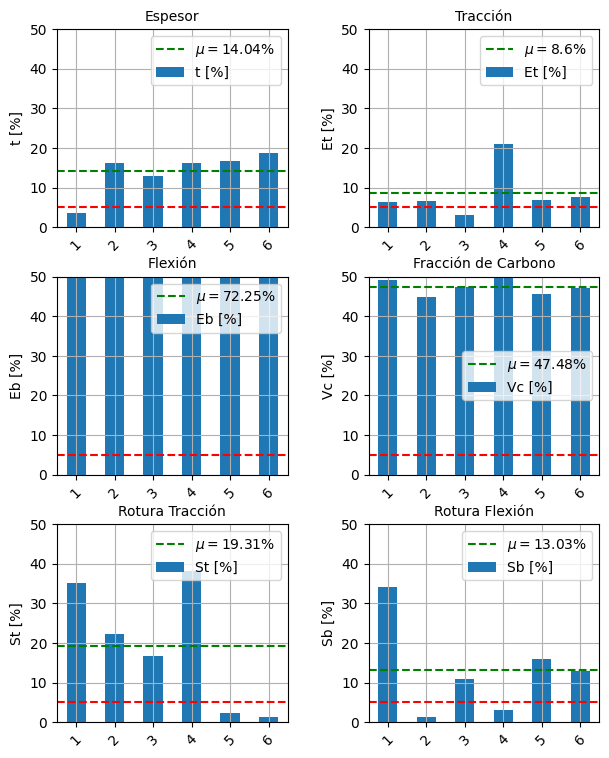

In [49]:
cols = error_df.columns

fig = plt.figure()
#padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)
fig.set_size_inches(7, 9)

names_title = ["Thickness", "Tensile", "Bending", "Carbon Fraction", "Stress"]
# español 
names_title = ["Espesor", "Tracción", "Flexión", "Fracción de Carbono", "Rotura Tracción","Rotura Flexión"]
for i, col in enumerate(cols):
    ax = fig.add_subplot(3, 2, i+1)
    error_df[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    # line 5% 
    ax.axhline(5, color='r', linestyle='--')
    # line mean 
    error_df[col].mean()
    ax.axhline(error_df[col].mean(), color='g', linestyle='--', label=r"$\mu = $"+str(round(error_df[col].mean(),2)) + "%")
    # 0,50
    plt.ylim(0,50)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.xticks(np.arange(len(df.index)), 1+np.arange(len(df.index)))
    plt.xlabel("")
    plt.title(names_title[i], fontsize=10)

In [50]:
error_df

,t [%],Et [%],Eb [%],Vc [%],St [%],Sb [%]
Name,,,,,,
TFP1,3.635339,6.363203,61.619714,49.243482,35.144623,34.087399
TFP2,16.130380,6.687916,71.974573,44.910609,22.358139,1.397903
TFP3,12.926784,3.049520,74.365645,47.417322,16.689313,10.794935
TFP4,16.130380,21.040873,76.872798,50.703739,38.090996,3.080342
TFP5,16.675665,6.730771,72.865910,45.585987,2.262114,15.969483
TFP6,18.759159,7.706991,75.774964,47.037028,1.306785,12.862615


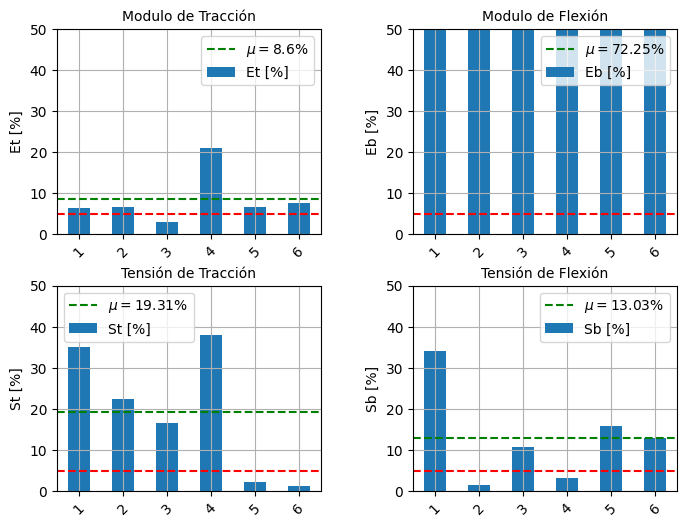

In [51]:
cols = error_df.columns
cols = [ "Et [%]", "Eb [%]" ,"St [%]", "Sb [%]"]

fig = plt.figure()
#padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)
fig.set_size_inches(8, 6)

names_title = ["Modulo de Tracción", "Modulo de Flexión", "Tensión de Tracción", "Tensión de Flexión"]

for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    error_df[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    # line 5% 
    ax.axhline(5, color='r', linestyle='--')
    # line mean 
    error_df[col].mean()
    ax.axhline(error_df[col].mean(), color='g', linestyle='--', label=r"$\mu = $"+str(round(error_df[col].mean(),2)) + "%")
    # 0,50
    plt.ylim(0,50)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.xticks(np.arange(len(df.index)), 1+np.arange(len(df.index)))
    plt.xlabel("")
    plt.title(names_title[i], fontsize=10)

In [52]:
df_pred

,t [mm],Et [GPa],Eb [GPa],St [MPa],Sb [MPa],Vc
Name,,,,,,
TFP1,5.458128,3.069120,5.066601,181.013519,181.013519,0.090347
TFP2,5.458128,2.107456,2.765970,119.071557,119.071557,0.090347
TFP3,5.458128,1.939433,2.364001,114.230059,114.230059,0.070987
TFP4,5.458128,1.935574,2.354769,114.158139,146.068281,0.070987
TFP5,6.650513,1.736064,1.666876,102.251888,124.589881,0.079444
TFP6,6.650513,1.873962,1.889083,105.879098,129.009493,0.095333


In [53]:
# save df_pred 
df_pred.to_csv("df_pred.csv")

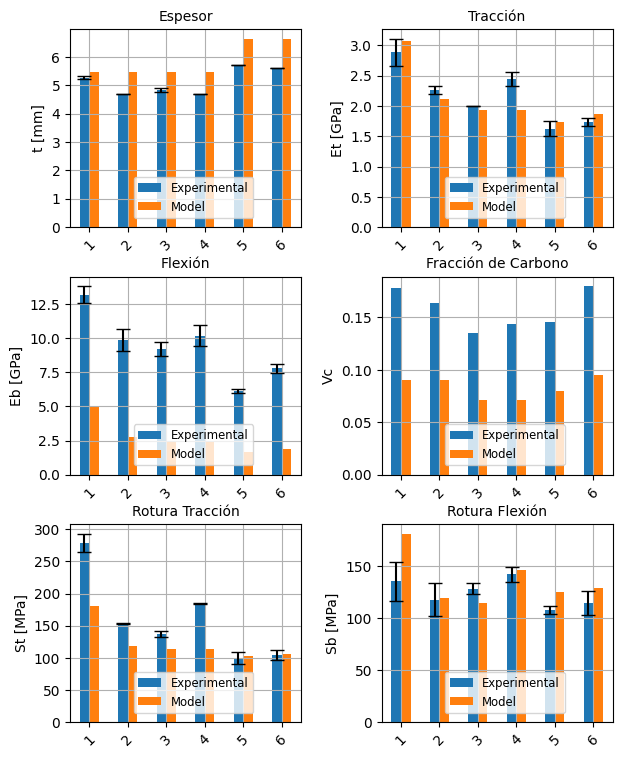

In [54]:
# plot with error bars 
fig = plt.figure()
#size
fig.set_size_inches(7, 9)

# subplot padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)
names_title = ["Espesor", "Tracción", "Flexión", "Fracción de Carbono", "Rotura Tracción","Rotura Flexión"]

cols = [ "t [mm]","Et [GPa]", "Eb [GPa]", "Vc", "St [MPa]", "Sb [MPa]"]
# names_title = ["Modulo de Tracción", "Modulo de Flexión", "Tensión de Tracción", "Tensión de Flexión"]

for i, col in enumerate(cols):

    names_leg = ["Experimental", "Model"]

    try:
        error = df_old[col]["std"]
        yerror = [error, np.nan*error]
    except:
        yerror = None
    # errror experimental
    
    pd.concat([ df[col], df_pred[col]], axis=1).plot(kind='bar', 
                                                     ax=fig.add_subplot(3, 2, i+1), capsize=5, yerr=yerror)
    plt.ylabel(col)
    # 45
    plt.xticks(rotation=45)
    # replace xticks by index
    plt.xticks(np.arange(len(df.index)), 1+np.arange(len(df.index)))
    plt.grid()
    # outside
    plt.legend(names_leg,loc='center left', bbox_to_anchor=(0.25, 0.15),fontsize='small')
    plt.title(names_title[i],fontsize=10)
    plt.xlabel("")
    plt.ylabel(col)
    plt.xticks(rotation=45)

    

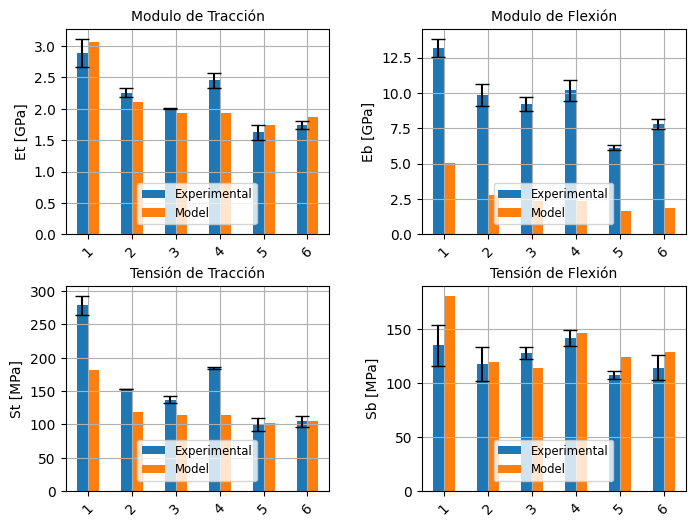

In [55]:
# plot with error bars 
fig = plt.figure()
#size
fig.set_size_inches(8, 6)

# subplot padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)

cols = [ "Et [GPa]", "Eb [GPa]" ,"St [MPa]", "Sb [MPa]"]
names_title = ["Modulo de Tracción", "Modulo de Flexión", "Tensión de Tracción", "Tensión de Flexión"]
for i, col in enumerate(cols):

    names_leg = ["Experimental", "Model"]

    try:
        error = df_old[col]["std"]
        yerror = [error, np.nan*error]
    except:
        yerror = None
    # errror experimental
    
    pd.concat([ df[col], df_pred[col]], axis=1).plot(kind='bar', 
                                                     ax=fig.add_subplot(2, 2, i+1), capsize=5, yerr=yerror)
    plt.ylabel(col)
    # 45
    plt.xticks(rotation=45)
    # replace xticks by index
    plt.xticks(np.arange(len(df.index)), 1+np.arange(len(df.index)))
    plt.grid()
    # outside
    plt.legend(names_leg,loc='center left', bbox_to_anchor=(0.25, 0.15),fontsize='small')
    plt.title(names_title[i],fontsize=10)
    plt.xlabel("")
    plt.ylabel(col)
    plt.xticks(rotation=45)

    

In [56]:
df_opt.iloc[:,:2].to_csv("df_opt.csv")

In [57]:
df_opt.round(2)

,x,unit,x_min,x_max
Variable,,,,
r,0.24,mm,0.20,0.40
tn,3.07,mm,2.24,3.07
tl,0.60,mm,0.35,0.60
En,0.80,GPa,0.00,0.80
EX,1.59,GPa,0.00,NaN
ESX,0.82,GPa,0.00,NaN
EY,5.99,GPa,0.00,NaN
ESY,0.81,GPa,0.00,NaN
SX,89.94,MPa,0.00,NaN


In [58]:
df_pred

,t [mm],Et [GPa],Eb [GPa],St [MPa],Sb [MPa],Vc
Name,,,,,,
TFP1,5.458128,3.069120,5.066601,181.013519,181.013519,0.090347
TFP2,5.458128,2.107456,2.765970,119.071557,119.071557,0.090347
TFP3,5.458128,1.939433,2.364001,114.230059,114.230059,0.070987
TFP4,5.458128,1.935574,2.354769,114.158139,146.068281,0.070987
TFP5,6.650513,1.736064,1.666876,102.251888,124.589881,0.079444
TFP6,6.650513,1.873962,1.889083,105.879098,129.009493,0.095333
